In [2]:
import sklearn.decomposition as skd
import numpy as np
import cv2
import os

from matplotlib import pyplot as plt
from IPython.display import Image
from enum import Enum

In [3]:
loc = '/Users/PeterWang/Documents/code/ntcf/train'
sample_img_loc = loc + '/cropped/ALB/img_01480.jpg'

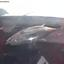

In [4]:
Image(sample_img_loc)

In [5]:
class Fish:
    ALB = 0
    BET = 1
    DOL = 2
    LAG = 3
    NoF = 4
    OTHER = 5
    SHARK = 6
    YFT = 7

In [6]:
group_cropped = list()
fish_folders = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
fish_folders = ['/cropped/' + x for x in fish_folders]
for x in fish_folders:
    temp = list()
    for f in os.listdir(loc + x):
        im = cv2.imread(loc + x + '/' + f, 0)
        im = im.reshape((1, im.shape[0] * im.shape[1]))
        temp.append(im)
    group_cropped.append(temp)

print len(group_cropped[Fish.OTHER])
# Now group_cropped has all our fishes group according to the enum

0


In [7]:
def list_diff(x, y):
    if len(x) != len(y):
        return False
    x.sort()
    y.sort()
    diff = [m for m,n in zip(x,y) if m != n] 
    return True if len(diff) > 0 else False

def set_diff(x):
    for m in xrange(len(x)):
        for n in xrange(m, len(x)):
            diff = list_diff(x[m], x[n])
            if diff:
                print 'fuck the world'
            

In [8]:
# now run PCA
pca_reduced = list()
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        temp_total = np.vstack(group_cropped[x])
        reduced = skd.PCA(n_components=2).fit_transform(temp_total)
        x = reduced[:,0]
        y = reduced[:,1]
        pca_reduced.append((x, y))
    else:
        temp_ = list()
        pca_reduced.append(temp_)


In [9]:
# plot results

fish_color_map = dict()
fish_color_map[Fish.ALB] = 'red'
fish_color_map[Fish.BET] = 'blue'
fish_color_map[Fish.DOL] = 'green'
fish_color_map[Fish.LAG] = 'cyan'
fish_color_map[Fish.SHARK] = 'yellow'
fish_color_map[Fish.YFT] = 'black'

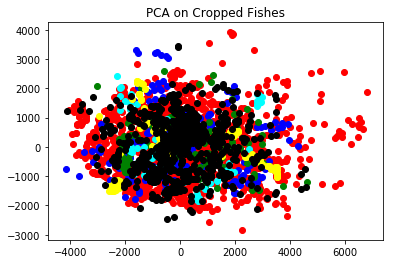

In [10]:
# plot pca results
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        plt.scatter(pca_reduced[x][0], pca_reduced[x][1], color=fish_color_map[x])
plt.title('PCA on Cropped Fishes')
plt.show()

In [11]:
# kpca

kpca_rbf_reduced = list()
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        temp_total = np.vstack(group_cropped[x])
        reduced = skd.KernelPCA(n_components=2, 
                                kernel='rbf', 
                                fit_inverse_transform=True, 
                                gamma=5).fit_transform(temp_total)
        x = reduced[:,0]
        y = reduced[:,1]
        kpca_rbf_reduced.append((x, y))
    else:
        temp_ = list()
        kpca_rbf_reduced.append(temp_)

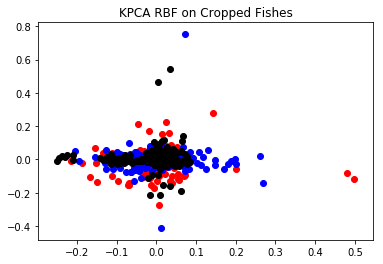

In [12]:
# plot pca results
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        plt.scatter(kpca_rbf_reduced[x][0], kpca_rbf_reduced[x][1], color=fish_color_map[x])
plt.title('KPCA RBF on Cropped Fishes')
plt.show()

In [13]:
# kpca with cosine kernel
kpca_cos_reduced = list()
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        temp_total = np.vstack(group_cropped[x])
        reduced = skd.KernelPCA(n_components=2, 
                                kernel='cosine',
                                degree=2,
                                fit_inverse_transform=True,
                                remove_zero_eig=True,
                                gamma=90).fit_transform(temp_total)
        x = reduced[:,0]
        y = reduced[:,1]
        kpca_cos_reduced.append((x, y))
    else:
        temp_ = list()
        kpca_cos_reduced.append(temp_)

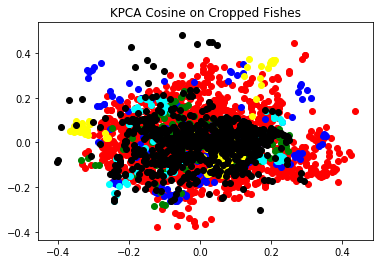

In [14]:
# plot pca results
for x in xrange(Fish.ALB, Fish.YFT+1):
    if x != Fish.NoF and x != Fish.OTHER:
        plt.scatter(kpca_cos_reduced[x][0], kpca_cos_reduced[x][1], color=fish_color_map[x])
plt.title('KPCA Cosine on Cropped Fishes')
plt.show()